In [1]:
import pandas as pd

In [33]:
# Load the dataset
data = pd.read_csv('medical_aid_claims.csv')

In [35]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   member-name           7000 non-null   object
 1   email                 7000 non-null   object
 2   gender                7000 non-null   object
 3   location              7000 non-null   object
 4   employer              7000 non-null   object
 5   relationship          7000 non-null   object
 6   patient_name          7000 non-null   object
 7   patient_suffix        7000 non-null   int64 
 8   patient_dob           7000 non-null   object
 9   cause                 7000 non-null   object
 10  Fee Charged           7000 non-null   int64 
 11  membership_period     7000 non-null   int64 
 12  number_of_claims      7000 non-null   int64 
 13  number_of_dependants  7000 non-null   int64 
 14  label                 7000 non-null   int64 
dtypes: int64(6), object(

In [37]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Missing Values in the Dataset:
member-name             0
email                   0
gender                  0
location                0
employer                0
relationship            0
patient_name            0
patient_suffix          0
patient_dob             0
cause                   0
Fee Charged             0
membership_period       0
number_of_claims        0
number_of_dependants    0
label                   0
dtype: int64


In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fill missing values (example: fill with median or mode)
data['Fee Charged'] = data['Fee Charged'].fillna(data['Fee Charged'].median())
data['cause'] = data['cause'].fillna('Unknown')

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fill missing values (example: fill with median or mode)
data['Fee Charged'] = data['Fee Charged'].fillna(data['Fee Charged'].median())
data['cause'] = data['cause'].fillna('Unknown')

In [43]:
# Normalize numerical columns
scaler = StandardScaler()
numerical_columns = ['Fee Charged', 'membership_period', 'number_of_claims', 'number_of_dependants']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [45]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Check for unusually high fees
high_fees = data[data['Fee Charged'] > data['Fee Charged'].quantile(0.95)]
print("\nClaims with Unusually High Fees:")
print(high_fees)


Summary Statistics:
       patient_suffix   Fee Charged  membership_period  number_of_claims  \
count     7000.000000  7.000000e+03       7.000000e+03      7.000000e+03   
mean       549.738857  7.612958e-17       9.034043e-17      4.872293e-17   
std        259.634041  1.000071e+00       1.000071e+00      1.000071e+00   
min        100.000000 -1.741233e+00      -1.716475e+00     -1.433879e+00   
25%        323.000000 -8.789375e-01      -8.628837e-01     -8.481444e-01   
50%        549.000000  3.438070e-04      -1.414473e-02     -2.624093e-01   
75%        777.000000  8.654642e-01       8.660398e-01      9.090609e-01   
max        999.000000  1.711436e+00       1.738654e+00      1.494796e+00   

       number_of_dependants        label  
count          7.000000e+03  7000.000000  
mean          -2.537653e-17     0.197000  
std            1.000071e+00     0.397761  
min           -1.320979e+00     0.000000  
25%           -1.320979e+00     0.000000  
50%           -4.278220e-01     0.00

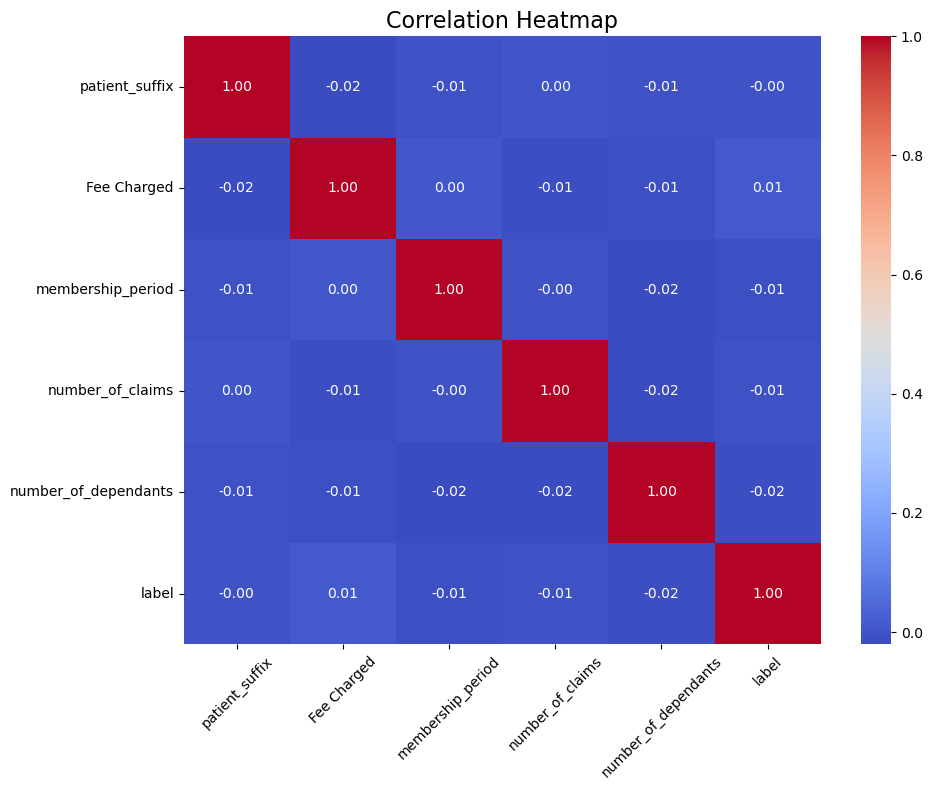

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the dataset contains only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [53]:
# Fraud rate by location
fraud_by_location = data.groupby('location')['label'].mean()
print("\nFraud Rate by Location:")
print(fraud_by_location)

# Fraud rate by cause
fraud_by_cause = data.groupby('cause')['label'].mean()
print("\nFraud Rate by Cause:")
print(fraud_by_cause)


Fraud Rate by Location:
location
Bindura      0.191489
Bulawayo     0.190053
Gwanda       0.191956
Gweru        0.206081
Harare       0.203125
Kadoma       0.189964
Kwekwe       0.198003
Marondera    0.193600
Masvingo     0.188065
Mutare       0.223183
Nyanga       0.174873
Rusape       0.212521
Name: label, dtype: float64

Fraud Rate by Cause:
cause
Accident At Home         0.198394
Accident At Work         0.193883
Other                    0.195066
Road Traffic Accident    0.200562
Name: label, dtype: float64


In [57]:
from sklearn.model_selection import train_test_split

# Ensure the target column ('label') exists in the dataset
if 'label' not in data.columns:
    raise ValueError("The target column 'label' is missing from the dataset.")

# Ensure there are no missing values in the features or target
data = data.dropna(subset=['label'])  # Drop rows where the target is missing
X = data.drop(columns=['label', 'member_name', 'email', 'patient_name', 'patient_suffix', 'patient_dob'], errors='ignore')
y = data['label']

# Check if X and y are not empty
if X.empty or y.empty:
    raise ValueError("Features (X) or target (y) are empty after preprocessing.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 4900 samples
Testing set size: 2100 samples


In [72]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

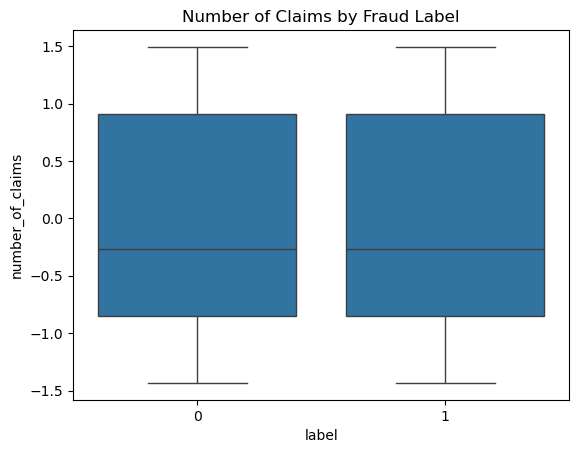

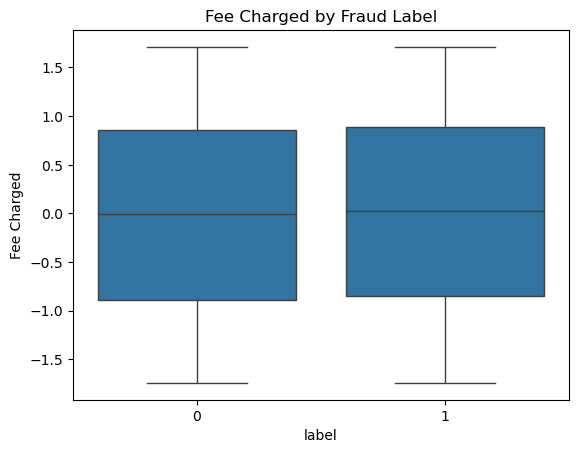

In [68]:
# Fraud by number of claims
sns.boxplot(x='label', y='number_of_claims', data=data)
plt.title('Number of Claims by Fraud Label')
plt.show()

# Fraud by Fee Charged
sns.boxplot(x='label', y='Fee Charged', data=data)
plt.title('Fee Charged by Fraud Label')
plt.show()